In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['lines.markersize'] = 17
plt.rcParams['axes.labelsize'] = 15
# plt.rcParams['savefig.transparent'] = False
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['figure.edgecolor'] = 'white'
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['savefig.edgecolor'] = 'white'

In [4]:
xgboost = pd.read_csv('../datatables/table_2_catwise.csv')
xgboost # this thing is too freakin big

,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,...,radial_velocity_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,catwise_w1,catwise_w2,mh_xgboost,teff_xgboost,logg_xgboost,in_training_sample
0,15741055975040,176.739184,-48.572035,45.136038,0.335043,1.439792,0.018947,-0.711280,0.017718,-1.412098,...,0.316921,10.254021,10.750235,9.595748,8.152,8.198,-0.144,5065.8,2.993,True
1,25980257976960,176.369336,-48.732076,44.850926,0.398492,2.021930,0.225709,14.369971,0.287671,0.083760,...,0.756424,11.724060,12.090828,10.976367,9.548,9.607,-0.083,5017.9,3.446,True
2,66627828480768,176.483565,-48.171322,45.305053,0.736093,0.534038,0.020692,3.309832,0.022959,1.594356,...,1.323430,10.508830,11.150953,9.741709,7.891,7.964,-0.401,4499.0,1.916,False
3,82467667849472,176.209301,-48.607026,44.866246,0.561503,2.209985,0.016049,-4.869755,0.015797,-12.678339,...,0.205614,10.651456,11.169626,9.980610,8.496,8.558,0.114,4938.3,3.203,True
4,101193725229056,175.755174,-48.727781,44.569524,0.689953,0.528788,0.024241,3.539184,0.027864,-1.599436,...,4.830661,14.332739,14.816101,13.685076,12.220,12.275,-0.478,4980.2,3.319,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17558136,6917522464931567744,48.777837,-28.451061,315.099714,-0.204654,0.836196,0.020659,-20.073536,0.023526,-15.432574,...,1.708913,13.638770,14.124463,12.990444,11.566,11.622,-0.226,4948.4,3.480,False
17558137,6917522778464669696,48.764318,-28.403106,315.052512,-0.190058,0.253461,0.039748,-2.246218,0.048224,-5.863423,...,NaN,15.192461,15.727985,14.501758,12.927,13.010,-0.267,4807.5,2.978,False
17558138,6917523083406587264,48.835692,-28.452592,315.127317,-0.161900,0.241092,0.021737,-6.512029,0.025727,-10.446484,...,1.725585,13.488787,13.980392,12.835599,11.363,11.423,-0.550,4953.4,2.448,False
17558139,6917523495723447552,48.879485,-28.434142,315.131445,-0.119403,0.882937,0.018369,0.778439,0.025178,-8.512295,...,0.967558,13.186939,13.715056,12.507987,10.979,11.060,0.114,4838.6,3.281,True


In [12]:
# so source_id is the Gaia DR3 source ID, and I need those.
xgboost[xgboost['source_id']==2053368789860449280]

,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,...,radial_velocity_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,catwise_w1,catwise_w2,mh_xgboost,teff_xgboost,logg_xgboost,in_training_sample
2956773,2053368789860449280,72.305962,10.518663,291.97392,39.668578,1.481396,0.010859,1.061357,0.010744,-2.261706,...,0.139932,9.2022,9.697361,8.54572,7.153,7.186,-0.002,5019.7,2.546,False


In [8]:
xgboost.keys()
# bruh why don't they quote errors

Index(['source_id', 'l', 'b', 'ra', 'dec', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ruwe', 'radial_velocity',
       'radial_velocity_error', 'phot_g_mean_mag', 'phot_bp_mean_mag',
       'phot_rp_mean_mag', 'catwise_w1', 'catwise_w2', 'mh_xgboost',
       'teff_xgboost', 'logg_xgboost', 'in_training_sample'],
      dtype='object')

In [4]:
highmass_rc_newvals = pd.read_csv('../datatables/highmass_rc_newvals.csv')
highmass_rc_newvals

,KIC,numax,new_numax,smooth_numax,Delnu,o_Teff,o_log(g),o_[Fe/H],g_Teff,g_Teff_e,...,a_log(g),a_log(g)_e,a_[Fe/H],a_[Fe/H]_e,L_Teff,L_Teff_e,L_log(g),L_log(g)_e,L_[Fe/H],L_[Fe/H]_e
0,3347458,39.99,40.32,41.422682,3.360,5000,2.519,0.18,NaN,NaN,...,2.525,0.039,0.165,0.007,NaN,NaN,NaN,NaN,NaN,NaN
1,8378545,48.82,48.07,48.952072,3.952,5058,2.608,0.22,NaN,NaN,...,3.142,0.059,0.157,0.007,5009.00,32.00,2.761,0.053,0.323,0.030
2,5978324,49.10,48.78,50.072904,4.024,5051,2.610,-0.07,NaN,NaN,...,2.701,0.050,-0.098,0.008,NaN,NaN,NaN,NaN,NaN,NaN
3,10068490,66.42,58.84,60.906533,5.206,5189,2.747,-0.14,5740.95,4.38,...,2.769,0.062,-0.201,0.010,5254.75,37.05,2.699,0.061,-0.216,0.035
4,4756133,80.81,80.29,83.967767,5.865,5152,2.831,0.11,NaN,NaN,...,3.014,0.056,0.091,0.008,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,88.56,85.53,89.092562,6.760,4948,2.862,0.18,NaN,NaN,...,2.858,0.049,0.076,0.008,5099.89,22.44,2.974,0.034,0.085,0.018
111,3430048,35.82,33.63,37.856607,3.487,5079,2.474,0.17,NaN,NaN,...,2.502,0.039,0.106,0.007,NaN,NaN,NaN,NaN,NaN,NaN
112,7116721,50.86,50.97,53.768334,4.522,5028,2.624,-0.26,NaN,NaN,...,NaN,NaN,NaN,NaN,4798.39,26.51,2.677,0.044,0.049,0.025
113,7347076,90.59,90.65,94.236618,7.216,5386,2.890,-0.17,NaN,NaN,...,NaN,NaN,NaN,NaN,5076.47,46.21,2.915,0.076,-0.007,0.044


In [15]:
# from astroquery.simbad import Simbad

In [70]:
# output_file = open('../datatables/kic_gaia_crossmatch.csv','w')

# for i in range(0,len(highmass_rc_newvals)):
# #     print('KIC '+str(highmass_rc_newvals['KIC'][i]))
#     result_table = Simbad.query_objectids('KIC '+str(highmass_rc_newvals['KIC'][i]))
# #     print(result_table)
#     for x in range(0,len(result_table)):
#         identifier = str(result_table.as_array()[x])[3:-3]
#         if identifier[:8] == 'Gaia DR3':
#             print(str(highmass_rc_newvals['KIC'][i]),identifier[9:])
#             output_file.write(str(highmass_rc_newvals['KIC'][i])+','+identifier[9:]+'\n')
        
# output_file.close()

In [73]:
kic_gaia_crossmatch = pd.read_csv('../datatables/kic_gaia_crossmatch.csv',names=['KIC','Gaia'])
kic_gaia_crossmatch

,KIC,Gaia
0,3347458,2052308929374737408
1,8378545,2079601488033100416
2,5978324,2076833261356367616
3,10068490,2127796789225921408
4,4756133,2076463752425923840
...,...,...
110,10162765,2085664057709800064
111,3430048,2099605418468855168
112,7116721,2125792864868124672
113,7347076,2105546045434515328


In [106]:
cross_list = list(kic_gaia_crossmatch['Gaia'])

In [107]:
xgboost.query('source_id in @cross_list')

,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,pmdec,...,radial_velocity_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,catwise_w1,catwise_w2,mh_xgboost,teff_xgboost,logg_xgboost,in_training_sample
2942855,2051309919976797696,70.068445,11.268911,289.864157,38.028055,1.693934,0.011004,-5.926328,0.010744,-12.575095,...,0.169889,9.269973,9.725513,8.646327,7.343,7.354,-0.095,5031.1,2.938,True
2942876,2051314661621040896,70.273641,11.158964,290.101254,38.161412,0.625413,0.014884,-1.884163,0.015439,-6.607693,...,0.251235,11.260097,11.782522,10.588838,9.110,9.173,-0.007,5050.6,2.785,True
2947093,2051890496478684160,70.721838,9.570196,292.155787,37.848542,0.495828,0.012672,-2.051580,0.013914,-10.210266,...,0.227180,11.318863,12.187857,10.408824,8.081,8.211,-0.156,4095.0,1.445,True
2947419,2051938565753316608,71.195813,9.642996,292.343470,38.297838,0.464080,0.011286,0.793452,0.011784,-5.100434,...,0.482251,11.840806,12.359185,11.169143,9.639,9.715,0.117,4965.2,2.806,True
2949447,2052180836272836864,72.427911,8.438182,294.430104,38.817249,0.935285,0.011414,0.477366,0.010481,-5.164422,...,0.170351,10.653308,11.210118,9.948869,8.394,8.451,0.014,5068.4,2.847,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3302640,2133390971247840000,81.994990,18.070403,287.577780,51.315788,1.517277,0.010331,7.670917,0.013593,5.692153,...,NaN,9.598982,10.049058,8.982600,7.732,7.718,0.021,5123.2,2.906,True
3305254,2134904685223637120,82.722698,12.510116,296.004046,49.668393,0.317060,0.009224,-4.324741,0.011421,-5.574794,...,0.332713,11.995813,12.573860,11.277668,9.586,9.686,-0.120,4666.1,2.253,True
3306314,2135241788615574656,83.261341,13.894701,294.440679,50.759905,0.743541,0.009824,-1.545002,0.010713,-4.353833,...,0.226051,10.678994,11.172046,10.028571,8.595,8.663,-0.068,5013.9,2.659,True
3306743,2135361948922317184,83.311788,13.099195,295.596682,50.448520,1.658857,0.010039,0.897775,0.012050,2.228060,...,0.167380,9.453858,9.937311,8.812778,7.464,7.487,0.110,4963.4,2.817,False


In [138]:
xgboost_matched = pd.DataFrame(columns=['KIC','source_id', 'l', 'b', 'ra', 'dec', 'parallax', 'parallax_error',
       'pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'ruwe',
       'radial_velocity', 'radial_velocity_error', 'phot_g_mean_mag',
       'phot_bp_mean_mag', 'phot_rp_mean_mag', 'catwise_w1', 'catwise_w2',
       'mh_xgboost', 'teff_xgboost', 'logg_xgboost', 'in_training_sample'],#['KIC',xgboost.keys()],
                               index=range(len(kic_gaia_crossmatch)))

for i in range(0,len(kic_gaia_crossmatch)):
    xgboost_matched['KIC'][i] = kic_gaia_crossmatch['KIC'][i]
    try:
        for key in xgboost.keys():
            xgboost_matched[key][i] = xgboost[key][xgboost['source_id']==kic_gaia_crossmatch['Gaia'][i]].values[0]
    except IndexError:
        pass
#     xgboost_matched.loc[i] = xgboost[xgboost['source_id']==kic_gaia_crossmatch['Gaia'][i]]
#     xgboost.combine_first()

xgboost_matched

,KIC,source_id,l,b,ra,dec,parallax,parallax_error,pmra,pmra_error,...,radial_velocity_error,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag,catwise_w1,catwise_w2,mh_xgboost,teff_xgboost,logg_xgboost,in_training_sample
0,3347458,2052308929374737408,71.473234,9.405004,292.772899,38.432476,0.758781,0.011353,3.731743,0.011515,...,0.162106,10.265156,10.832743,9.556507,7.928,8.002,0.166,4808.6,2.525,True
1,8378545,2079601488033100416,78.039737,9.866891,296.267023,44.371751,0.447417,0.008851,-12.264672,0.010282,...,0.273964,11.725356,12.338205,10.978833,9.242,9.319,0.238,4896.0,2.868,True
2,5978324,2076833261356367616,75.38475,8.099422,296.651948,41.222032,0.557987,0.031316,-1.545881,0.033017,...,0.700108,10.96373,11.508093,10.257098,8.593,8.648,0.051,5015.6,2.745,True
3,10068490,2127796789225921408,78.241296,15.561635,289.05289,47.040956,0.345429,0.008802,-5.732575,0.010678,...,0.786594,12.214387,12.668091,11.595468,10.262,10.301,-0.36,5054.7,2.771,True
4,4756133,2076463752425923840,73.327644,8.954284,294.38312,39.844891,0.840927,0.010923,-3.614574,0.011349,...,0.273694,10.587805,11.103557,9.917423,8.472,8.52,0.066,5070.0,2.877,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,10162765,2085664057709800064,81.371816,9.665456,298.810776,47.142444,0.659347,0.079177,3.342427,0.093955,...,0.33303,11.078756,11.630997,10.372764,8.795,8.863,-0.004,4977.7,2.836,True
111,3430048,2099605418468855168,69.73155,13.325776,287.310862,38.598838,0.38378,0.009391,-0.706116,0.010141,...,0.51598,12.03151,12.597859,11.323577,9.643,9.759,0.086,4782.4,2.55,True
112,7116721,2125792864868124672,74.826549,12.174029,291.452932,42.617026,0.2626,0.010603,-1.853503,0.011112,...,1.395902,13.366398,13.922006,12.667557,11.014,11.122,0.033,4789.7,2.473,False
113,7347076,2105546045434515328,73.526174,15.76779,286.281579,42.939891,0.233368,0.010696,-2.887998,0.012951,...,1.518089,13.616597,14.086949,12.989111,11.603,11.677,-0.056,5048.4,2.758,False


In [139]:
xgboost_matched.to_csv('../datatables/xgboost_matched.csv',index=False)

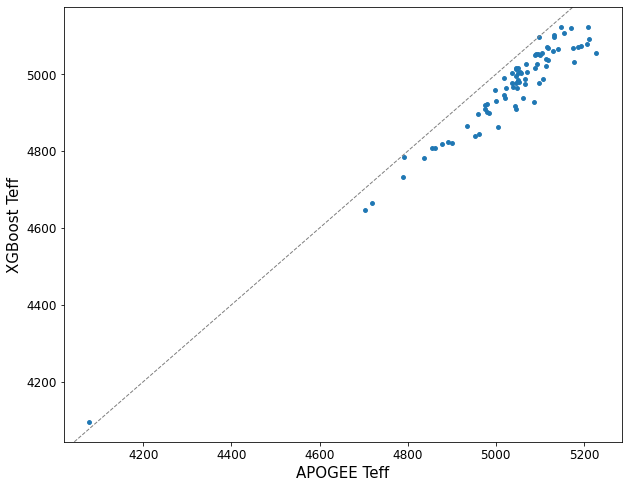

In [151]:
plt.scatter(highmass_rc_newvals['a_Teff'],xgboost_matched['teff_xgboost'],s=15)
plt.axline((4200, 4200), slope=1,color='grey',linestyle='--')
plt.xlabel('APOGEE Teff')
plt.ylabel('XGBoost Teff')
# plt.savefig('/Users/ccra8514/Desktop/xgboost_teffcomp')
plt.show()

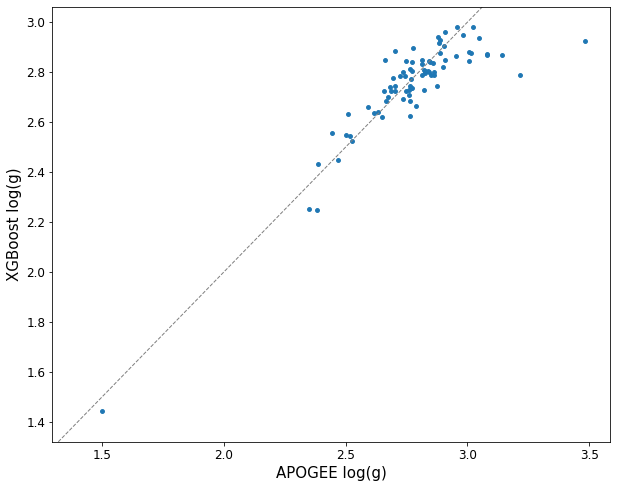

In [150]:
plt.scatter(highmass_rc_newvals['a_log(g)'],xgboost_matched['logg_xgboost'],s=15)
plt.axline((1.4, 1.4), slope=1,color='grey',linestyle='--')
plt.xlabel('APOGEE log(g)')
plt.ylabel('XGBoost log(g)')
# plt.savefig('/Users/ccra8514/Desktop/xgboost_loggcomp')
plt.show()

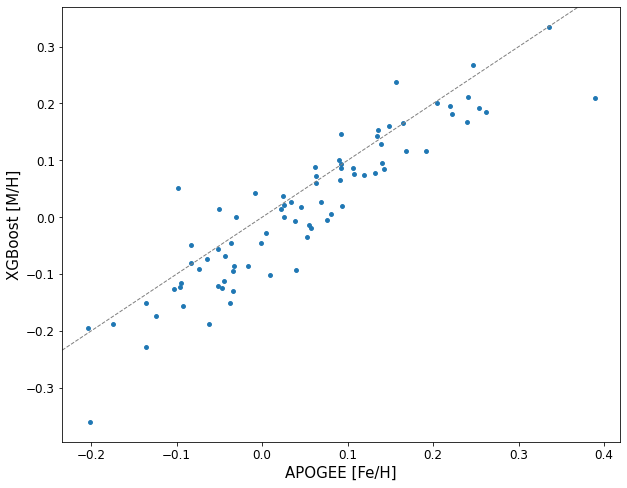

In [149]:
plt.scatter(highmass_rc_newvals['a_[Fe/H]'],xgboost_matched['mh_xgboost'],s=15)
plt.axline((0, 0), slope=1,color='grey',linestyle='--')
plt.xlabel('APOGEE [Fe/H]')
plt.ylabel('XGBoost [M/H]')
# plt.savefig('/Users/ccra8514/Desktop/xgboost_fehcomp')
plt.show()

In [9]:
apokasc = pd.read_csv('../datatables/apokasc_results.csv',skiprows=1,header=None,delimiter='\s+')
apokasc

ParserError: Error tokenizing data. C error: Expected 44 fields in line 3, saw 45
